In [1]:
## Reading libraries
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE,RFECV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
## Reading data
data = pd.read_csv(r"C:\Users\harsh\Documents\BADM\Train.csv")
data.drop(columns = 'duration',inplace = True)
#Remove NA

In [38]:
data.describe()

,age,job,marital,education,connect,balance,landline,smart,last_day,last_month,campaign,passdays,previous,target
count,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000
mean,1.969858,4.332798,1.167127,1.225067,0.017972,1372.520514,0.554656,0.160709,15.818826,5.515873,2.768243,40.218475,0.581144,0.115854
std,0.752448,3.272224,0.608499,0.746798,0.132850,3088.652335,0.497010,0.367267,8.321429,3.007043,3.092290,100.061376,2.333588,0.320053
min,1.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,8.000000,3.000000,1.000000,-1.000000,0.000000,0.000000
50%,2.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,16.000000,6.000000,2.000000,-1.000000,0.000000,0.000000
75%,2.000000,7.000000,2.000000,2.000000,0.000000,1436.250000,1.000000,0.000000,21.000000,8.000000,3.000000,-1.000000,0.000000,0.000000
max,4.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,11.000000,58.000000,871.000000,275.000000,1.000000


In [16]:
data['age'].value_counts()

2    18716
1    11703
3     9696
4      393
Name: age, dtype: int64

In [4]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 33, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 33) & (dataframe['age'] <= 48), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 48) & (dataframe['age'] <= 71), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 71) & (dataframe['age'] <= 95), 'age'] = 4
           
    return dataframe

age(data);

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'connect', 'balance', 'landline',
       'smart', 'last_day', 'last_month', 'campaign', 'passdays', 'previous',
       'poutcome', 'target'],
      dtype='object')

In [6]:
## Label encoding for both the dataframes
labelencoder_X = LabelEncoder()

In [7]:
data['job'] = labelencoder_X.fit_transform(data.job)
jobs_key = pd.DataFrame(list(zip(list(labelencoder_X.classes_),
                                 list(np.arange(0,len(list(labelencoder_X.classes_)),1)))), columns = ['jobs','label'])

In [8]:
data['marital'] = labelencoder_X.fit_transform(data.marital)
marital_key = pd.DataFrame(list(zip(list(labelencoder_X.classes_),
                                 list(np.arange(0,len(list(labelencoder_X.classes_)),1)))), columns = ['marital','label'])

In [9]:
data['education'] = labelencoder_X.fit_transform(data.education)
education_key = pd.DataFrame(list(zip(list(labelencoder_X.classes_),
                                 list(np.arange(0,len(list(labelencoder_X.classes_)),1)))), columns = ['education','label'])

In [10]:
data['connect'] = labelencoder_X.fit_transform(data.connect)
connect_key = pd.DataFrame(list(zip(list(labelencoder_X.classes_),
                                 list(np.arange(0,len(list(labelencoder_X.classes_)),1)))), columns = ['connect','label'])

In [11]:
data['landline'] = labelencoder_X.fit_transform(data.landline)
landline_key = pd.DataFrame(list(zip(list(labelencoder_X.classes_),
                                 list(np.arange(0,len(list(labelencoder_X.classes_)),1)))), columns = ['landline','label'])

In [12]:
data['smart'] = labelencoder_X.fit_transform(data.smart)
smart_key = pd.DataFrame(list(zip(list(labelencoder_X.classes_),
                                 list(np.arange(0,len(list(labelencoder_X.classes_)),1)))), columns = ['smart','label'])

In [13]:
data['last_month'] = labelencoder_X.fit_transform(data.last_month)
month_key = pd.DataFrame(list(zip(list(labelencoder_X.classes_),
                                 list(np.arange(0,len(list(labelencoder_X.classes_)),1)))), columns = ['month','label'])

In [14]:
fresh_targets = data[data.previous == 0]
repeated_targets = data[data.previous != 0]
fresh_targets.shape, repeated_targets.shape

((33094, 15), (7414, 15))

In [15]:
repeated_targets.poutcome.value_counts()

failure    4372
other      1671
success    1366
unknown       5
Name: poutcome, dtype: int64

In [17]:
repeated_targets = repeated_targets[repeated_targets.poutcome != 'unknown']

In [18]:
fresh_targets.drop(columns = ["previous","poutcome","passdays"], inplace = True)
fresh_targets.head()

,age,job,marital,education,connect,balance,landline,smart,last_day,last_month,campaign,target
0,3,4,1,2,0,2143,1,0,5,8,1,0
1,2,9,2,1,0,29,1,0,5,8,1,0
2,1,2,1,1,0,2,1,1,5,8,1,0
3,3,5,1,0,0,229,1,0,5,8,1,0
4,3,1,1,0,0,52,1,0,5,8,1,0


In [19]:
repeated_targets['campaign'] = repeated_targets['campaign'] - 1
repeated_targets.head()

,age,job,marital,education,connect,balance,landline,smart,last_day,last_month,campaign,passdays,previous,poutcome,target
21538,1,0,1,2,0,882,0,0,21,10,0,151,3,failure,0
21540,2,0,2,1,0,-247,1,1,21,10,0,166,1,other,1
21542,1,7,1,1,0,3444,1,0,21,10,0,91,4,failure,1
21548,2,4,1,2,0,2415,1,0,22,10,0,86,4,other,0
21553,2,4,1,2,0,0,1,0,23,10,0,143,3,failure,1


In [20]:
repeated_targets['poutcome'] = labelencoder_X.fit_transform(repeated_targets.poutcome)
outcome_key = pd.DataFrame(list(zip(list(labelencoder_X.classes_),
                                 list(np.arange(0,len(list(labelencoder_X.classes_)),1)))), columns = ['outcome','label'])

In [21]:
repeated_targets.head()

,age,job,marital,education,connect,balance,landline,smart,last_day,last_month,campaign,passdays,previous,poutcome,target
21538,1,0,1,2,0,882,0,0,21,10,0,151,3,0,0
21540,2,0,2,1,0,-247,1,1,21,10,0,166,1,1,1
21542,1,7,1,1,0,3444,1,0,21,10,0,91,4,0,1
21548,2,4,1,2,0,2415,1,0,22,10,0,86,4,1,0
21553,2,4,1,2,0,0,1,0,23,10,0,143,3,0,1


In [22]:
fresh_targets['campaign'] = fresh_targets['campaign'] - 1

In [23]:
fresh_targets.head()

,age,job,marital,education,connect,balance,landline,smart,last_day,last_month,campaign,target
0,3,4,1,2,0,2143,1,0,5,8,0,0
1,2,9,2,1,0,29,1,0,5,8,0,0
2,1,2,1,1,0,2,1,1,5,8,0,0
3,3,5,1,0,0,229,1,0,5,8,0,0
4,3,1,1,0,0,52,1,0,5,8,0,0


In [24]:
repeated_targets.reset_index(inplace = True)
repeated_targets.drop(columns = 'index', inplace = True)
repeated_targets.head()

,age,job,marital,education,connect,balance,landline,smart,last_day,last_month,campaign,passdays,previous,poutcome,target
0,1,0,1,2,0,882,0,0,21,10,0,151,3,0,0
1,2,0,2,1,0,-247,1,1,21,10,0,166,1,1,1
2,1,7,1,1,0,3444,1,0,21,10,0,91,4,0,1
3,2,4,1,2,0,2415,1,0,22,10,0,86,4,1,0
4,2,4,1,2,0,0,1,0,23,10,0,143,3,0,1


In [25]:
rX = repeated_targets.drop(columns = 'target')
cols1 = list(rX)
rY = repeated_targets['target']

In [26]:
fX = fresh_targets.drop(columns = 'target')
cols2 = list(fX)
fY = fresh_targets['target']

### Distance based methods approach
1. Logistic Regression
2. KNearest Neighbours
3. LASSO Regression
4. Support Vector Classification
5. Elastic Net
6. Stochastic Gradient Descent
7. RANSAC Robust
8. FDA
9. Gaussian Naive Bayes

##### SMOTE for tackling class imbalance, and then using feature selection method

In [27]:
sc = StandardScaler()

In [28]:
smt = SMOTE()

In [29]:
rX1, rY1 = smt.fit_sample(rX, rY)
rX1 = pd.DataFrame(rX1, columns = cols1)
rY1 = pd.DataFrame(rY1, columns = ['target'])

In [30]:
fX1, fY1 = smt.fit_sample(fX, fY)
fX1 = pd.DataFrame(fX1, columns = cols2)
fY1 = pd.DataFrame(fY1, columns = ['target'])

In [31]:
rXtr, rXte, rYtr, rYte = train_test_split(rX1, rY1, stratify=rY1, test_size=0.25, random_state = 42)
rXtr = pd.DataFrame(sc.fit_transform(rXtr), columns = list(rXtr))
rXte = pd.DataFrame(sc.fit_transform(rXte), columns = list(rXte))

In [32]:
rXtr.shape, rXte.shape

((8551, 14), (2851, 14))

In [33]:
rYtr.target.value_counts()

1    4276
0    4275
Name: target, dtype: int64

In [34]:
rYte.target.value_counts()

0    1426
1    1425
Name: target, dtype: int64

In [35]:
# Logistic Regression
estimator = LogisticRegression(penalty='l1', class_weight='balanced', solver = 'liblinear')
selector = RFE(estimator, 5, step=1)
selector = selector.fit(rXtr, rYtr)
logpred = selector.predict(rXte)
print(classification_report(rYte,logpred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1426
           1       0.77      0.79      0.78      1425

    accuracy                           0.78      2851
   macro avg       0.78      0.78      0.78      2851
weighted avg       0.78      0.78      0.78      2851



In [36]:
# Support Vector Machines
estimator = SVC(kernel = 'linear',class_weight='balanced')
selector = RFE(estimator,5, step=1)
selector.fit(rXtr, rYtr)
svcpred = selector.predict(rXte)
print(classification_report(rYte,svcpred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1426
           1       0.75      0.78      0.76      1425

    accuracy                           0.76      2851
   macro avg       0.76      0.76      0.76      2851
weighted avg       0.76      0.76      0.76      2851



### Tree based methods approach
1. Decision Trees
2. Random Forests
3. ADA Boost
4. Extreme Gradient Boosting

# Gupta's Code

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(classification_report(y_test,gbkpred))

[[2995   17]
 [ 283   15]]
91.0
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3012
           1       0.47      0.05      0.09       298

    accuracy                           0.91      3310
   macro avg       0.69      0.52      0.52      3310
weighted avg       0.87      0.91      0.87      3310



Best parameters : {'class_weight': {0: 0.09736842105263158, 1: 0.9026315789473685}}


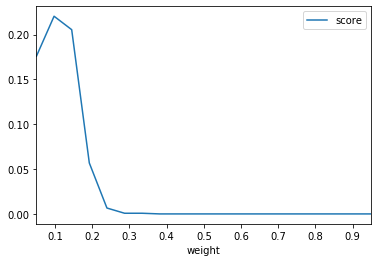

In [71]:
from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.05, 0.95, 20)

gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, y_train)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')